# In general group by process "split-apply-combine"

- Splitting the data into groups
- Applying a function to each group independently
- Combining the results into a data structure

Source: https://github.com/BindiChen/machine-learning/blob/master/data-analysis/032-pandas-groupby/pandas-groupby.ipynb
Note: This jupyter notebook is inspired from the above source

In [1]:
import pandas as pd
import numpy as np

In [2]:
remote_url = "https://raw.githubusercontent.com/prodramp/publiccode/master/datasets/titanic.csv"

In [3]:
df = pd.read_csv(remote_url)

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [22]:
df_groupby_sex = df.groupby('Sex')

In [23]:
df_groupby_sex

In [24]:
type(df_groupby_sex)

pandas.core.groupby.generic.DataFrameGroupBy

In [25]:
df_groupby_sex.ngroups

2

In [47]:
df_groupby_sex.groups

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

In [38]:
df_groupby_sex.size()

Sex
female    314
male      577
dtype: int64

In [40]:
df_groupby_sex.groups

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

In [28]:
df_groupby_sex.first()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
male,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,E46,S


In [32]:
df_groupby_sex.last()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",19.0,1,2,W./C. 6607,23.45,B42,S
male,891,0,3,"Dooley, Mr. Patrick",32.0,0,0,370376,7.75,C148,Q


In [33]:
# To retrieve one of the created groups
df_sex_female = df_groupby_sex.get_group('female')

In [34]:
df_sex_female

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,S


## Groups as keys

In [141]:
df_groupby_sex.groups.keys()

dict_keys(['female', 'male'])

In [143]:
group_by_keys = df_groupby_sex.groups.keys()

In [144]:
group_by_keys

dict_keys(['female', 'male'])

In [145]:
len(group_by_keys)

2

In [150]:
type(group_by_keys)

dict_keys

In [151]:
for each_key in group_by_keys:
    print(each_key)

female
male


In [163]:
keys = [key for key in group_by_keys]

In [164]:
keys

['female', 'male']

In [165]:
keys[0]

'female'

In [166]:
keys[1]

'male'

In [168]:
dict(list(df_groupby_sex))[keys[0]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [170]:
for each_key in group_by_keys:
    x = df_groupby_sex.get_group(each_key)
    print(x)

     PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
880          881         1       2   
882          883         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   

                                                  Name   Age  SibSp  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                               Heikkinen, Miss. Laina  26.0      0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0      0      2   
9                  Nasser, Mrs. Nicholas (Adele Achem)  14.0      1      0   
..                                                 ...   ...    ...    ... 

In [161]:
for each_key in group_by_keys:
    print(dict(list(df_groupby_sex))[each_key])

     PassengerId  Survived  Pclass  \
1              2         1       1   
2              3         1       3   
3              4         1       1   
8              9         1       3   
9             10         1       2   
..           ...       ...     ...   
880          881         1       2   
882          883         0       3   
885          886         0       3   
887          888         1       1   
888          889         0       3   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
..                                                 ...     ...   ... 

## Raw data processing

In [134]:
list(df_groupby_sex)

[('female',
       PassengerId  Survived  Pclass  \
  1              2         1       1   
  2              3         1       3   
  3              4         1       1   
  8              9         1       3   
  9             10         1       2   
  ..           ...       ...     ...   
  880          881         1       2   
  882          883         0       3   
  885          886         0       3   
  887          888         1       1   
  888          889         0       3   
  
                                                    Name     Sex   Age  SibSp  \
  1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
  2                               Heikkinen, Miss. Laina  female  26.0      0   
  3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
  8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
  9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
  ..               

In [135]:
dict(list(df_groupby_sex))

{'female':      PassengerId  Survived  Pclass  \
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 8              9         1       3   
 9             10         1       2   
 ..           ...       ...     ...   
 880          881         1       2   
 882          883         0       3   
 885          886         0       3   
 887          888         1       1   
 888          889         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
 9                  Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
 ..                                     

In [136]:
dict(list(df_groupby_sex))['male']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [137]:
dict(list(df_groupby_sex))['female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


## Processing Another Group

In [15]:
df_group_pclass = df.groupby('Pclass')

In [16]:
df_group_pclass

In [17]:
df_group_pclass.ngroups

3

In [18]:
df_group_pclass.ngroup

<bound method GroupBy.ngroup of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fedb0a5d910>>

In [19]:
df_group_pclass.size()

Pclass
1    216
2    184
3    491
dtype: int64

In [20]:
df_group_pclass.groups

{1: Int64Index([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,
             ...
             853, 856, 857, 862, 867, 871, 872, 879, 887, 889],
            dtype='int64', length=216),
 2: Int64Index([  9,  15,  17,  20,  21,  33,  41,  43,  53,  56,
             ...
             848, 854, 861, 864, 865, 866, 874, 880, 883, 886],
            dtype='int64', length=184),
 3: Int64Index([  0,   2,   4,   5,   7,   8,  10,  12,  13,  14,
             ...
             875, 876, 877, 878, 881, 882, 884, 885, 888, 890],
            dtype='int64', length=491)}

In [30]:
df_group_pclass.first()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,10,1,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,D56,C
3,1,0,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,G6,S


In [31]:
df_group_pclass.last()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
2,887,0,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,E77,S
3,891,0,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,E121,Q


# Listing all the methods available on groupby object

In [49]:
import IPython

methods = [method_name for method_name in dir(df_groupby_sex) 
           if callable(getattr(df_groupby_sex, method_name)) & ~method_name.startswith('_')]

print(IPython.utils.text.columnize(methods))

agg        corr      cumsum     get_group  mean     pct_change  sem    transform
aggregate  corrwith  describe   head       median   pipe        shift  tshift   
all        count     diff       hist       min      plot        size   var      
any        cov       expanding  idxmax     ngroup   prod        skew 
apply      cumcount  ffill      idxmin     nth      quantile    std  
backfill   cummax    fillna     last       nunique  rank        sum  
bfill      cummin    filter     mad        ohlc     resample    tail 
boxplot    cumprod   first      max        pad      rolling     take 



In [50]:
import IPython

methods = [method_name for method_name in dir(df_group_pclass) 
           if callable(getattr(df_group_pclass, method_name)) & ~method_name.startswith('_')]

print(IPython.utils.text.columnize(methods))

agg        corr      cumsum     get_group  mean     pct_change  sem    transform
aggregate  corrwith  describe   head       median   pipe        shift  tshift   
all        count     diff       hist       min      plot        size   var      
any        cov       expanding  idxmax     ngroup   prod        skew 
apply      cumcount  ffill      idxmin     nth      quantile    std  
backfill   cummax    fillna     last       nunique  rank        sum  
bfill      cummin    filter     mad        ohlc     resample    tail 
boxplot    cumprod   first      max        pad      rolling     take 



## Processing 

In [65]:
df.groupby('Sex').Age.max()

Sex
female    63.0
male      80.0
Name: Age, dtype: float64

In [68]:
df_groupby_sex.Age.max()

Sex
female    63.0
male      80.0
Name: Age, dtype: float64

In [60]:
df_groupby_sex.get_group('male')['Age'].max()

80.0

In [61]:
df_groupby_sex.get_group('female')['Age'].max()

63.0

# Aggregating Values based on Group

In [118]:
df.groupby('Sex').Age.agg(['max', 'min', 'count', 'median', 'mean'])

,max,min,count,median,mean
Sex,,,,,
female,63.0,0.75,261,27.0,27.915709
male,80.0,0.42,453,29.0,30.726645


In [70]:
# with custom column name
df.groupby('Sex').Age.agg(
    sex_max=('max'),
    sex_min=('min'),
)


,sex_max,sex_min
Sex,,
female,63.0,0.75
male,80.0,0.42


In [120]:
# Custom aggregation function
def categorize(x):
    m = x.mean()
    return True if m > 29 else False

df.groupby('Sex').Age.agg(['max', 'mean', categorize])

,max,mean,categorize
Sex,,,
female,63.0,27.915709,False
male,80.0,30.726645,True


In [75]:
# Use lambda
df.groupby('Sex').Age.agg(
    ['max', 'mean', lambda x: True if x.mean() > 29 else False]
)

,max,mean,<lambda_0>
Sex,,,
female,63.0,27.915709,False
male,80.0,30.726645,True


# Applicable to full DataFrame when calling without column

In [77]:
df.groupby('Sex').mean()
## applicable to all numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [78]:
df.groupby('Sex').agg(['mean', 'median'])

PassengerId         Survived           Pclass               Age         \
              mean median      mean median      mean median       mean median   
Sex                                                                             
female  431.028662  414.5  0.742038      1  2.159236      2  27.915709   27.0   
male    454.147314  464.0  0.188908      0  2.389948      3  30.726645   29.0   

           SibSp            Parch              Fare         
            mean median      mean median       mean median  
Sex                                                         
female  0.694268      0  0.649682      0  44.479818   23.0  
male    0.429809      0  0.235702      0  25.523893   10.5

# Transforming the Data with groupby

In [79]:
# A lambda expression for Standardization.
standardization = lambda x: (x - x.mean()) / x.std()

In [80]:
df.groupby('Sex').Age.transform(standardization)

0     -0.594531
1      0.714684
2     -0.135768
3      0.502071
4      0.291136
         ...   
886   -0.253890
887   -0.631865
888         NaN
889   -0.322018
890    0.086751
Name: Age, Length: 891, dtype: float64

In [81]:
df.groupby('Sex').Age.apply(standardization)

0     -0.594531
1      0.714684
2     -0.135768
3      0.502071
4      0.291136
         ...   
886   -0.253890
887   -0.631865
888         NaN
889   -0.322018
890    0.086751
Name: Age, Length: 891, dtype: float64

# Filtering Data

In [82]:
# Let's group by Cabin and take a quick look at the size for each group
df.groupby('Cabin').size()

Cabin
A10    1
A14    1
A16    1
A19    1
A20    1
      ..
F33    3
F38    1
F4     2
G6     4
T      1
Length: 147, dtype: int64

In [83]:
# filter data to return all passengers that lived in a cabin has ≥ 4 people.
df.groupby('Cabin').filter(lambda x: len(x) >= 4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
205,206,0,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S
251,252,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
390,391,1,1,"Carter, Mr. William Ernest",male,36.0,1,2,113760,120.0000,B96 B98,S
394,395,1,3,"Sandstrom, Mrs. Hjalmar (Agnes Charlotta Bengt...",female,24.0,0,2,PP 9549,16.7000,G6,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S


# Group by multiple categories

In [84]:
# Creating a subset
subset = df.loc[:, ['Sex', 'Pclass', 'Age', 'Fare']]

In [86]:
subset

,Sex,Pclass,Age,Fare
0,male,3,22.0,7.2500
1,female,1,38.0,71.2833
2,female,3,26.0,7.9250
3,female,1,35.0,53.1000
4,male,3,35.0,8.0500
...,...,...,...,...
886,male,2,27.0,13.0000
887,female,1,19.0,30.0000
888,female,3,NaN,23.4500
889,male,1,26.0,30.0000


In [85]:
# Grouping by multiple categories
subset.groupby(['Sex', 'Pclass']).mean()

Age        Fare
Sex    Pclass                       
female 1       34.611765  106.125798
       2       28.722973   21.970121
       3       21.750000   16.118810
male   1       41.281386   67.226127
       2       30.740707   19.741782
       3       26.507589   12.661633

In [87]:
# Creating a subset
subset_5 = df.loc[:, ['Sex', 'Pclass', 'Survived', 'Age', 'Fare']]

In [97]:
subset_5.shape

(891, 5)

In [88]:
subset_5

,Sex,Pclass,Survived,Age,Fare
0,male,3,0,22.0,7.2500
1,female,1,1,38.0,71.2833
2,female,3,1,26.0,7.9250
3,female,1,1,35.0,53.1000
4,male,3,0,35.0,8.0500
...,...,...,...,...,...
886,male,2,0,27.0,13.0000
887,female,1,1,19.0,30.0000
888,female,3,0,NaN,23.4500
889,male,1,1,26.0,30.0000


In [121]:
# Grouping by multiple categories
subset_5.groupby(['Sex', 'Pclass', 'Survived']).mean()

Age        Fare
Sex    Pclass Survived                       
female 1      0         13.500000  151.550000
              1         34.897436  108.394042
       2      0         38.400000   19.300000
              1         27.750000   22.613321
       3      0         23.989362   19.099735
              1         20.037500   12.257243
male   1      0         45.086538   61.439580
              1         36.023590   75.730214
       2      0         34.125000   18.975054
              1         18.179231   19.574447
       3      0         26.895722   11.960256
              1         22.777059   16.137298

In [122]:
subset_5.groupby(by=['Sex', 'Pclass', 'Survived']).mean()

Age        Fare
Sex    Pclass Survived                       
female 1      0         13.500000  151.550000
              1         34.897436  108.394042
       2      0         38.400000   19.300000
              1         27.750000   22.613321
       3      0         23.989362   19.099735
              1         20.037500   12.257243
male   1      0         45.086538   61.439580
              1         36.023590   75.730214
       2      0         34.125000   18.975054
              1         18.179231   19.574447
       3      0         26.895722   11.960256
              1         22.777059   16.137298

In [92]:
df_subset_5 = subset_5.groupby(['Sex', 'Pclass', 'Survived']).mean()

In [104]:
subset_5.shape

(891, 5)

In [93]:
df_subset_5.reset_index()

,Sex,Pclass,Survived,Age,Fare
0,female,1,0,25.666667,110.604167
1,female,1,1,34.939024,105.978159
2,female,2,0,36.000000,18.250000
3,female,2,1,28.080882,22.288989
4,female,3,0,23.818182,19.773093
5,female,3,1,19.329787,12.464526
6,male,1,0,44.581967,62.894910
7,male,1,1,36.248000,74.637320
8,male,2,0,33.369048,19.488965
9,male,2,1,16.022000,21.095100


In [123]:
# A better way is to set as_index=False
subset_5.groupby(by=['Sex', 'Pclass', 'Survived'], as_index=False).mean()

,Sex,Pclass,Survived,Age,Fare
0,female,1,0,13.500000,151.550000
1,female,1,1,34.897436,108.394042
2,female,2,0,38.400000,19.300000
3,female,2,1,27.750000,22.613321
4,female,3,0,23.989362,19.099735
5,female,3,1,20.037500,12.257243
6,male,1,0,45.086538,61.439580
7,male,1,1,36.023590,75.730214
8,male,2,0,34.125000,18.975054
9,male,2,1,18.179231,19.574447


# Handling missing values

In [95]:
subset_5.head()

,Sex,Pclass,Survived,Age,Fare
0,male,3,0,22.0,7.2500
1,female,1,1,38.0,71.2833
2,female,3,1,26.0,7.9250
3,female,1,1,35.0,53.1000
4,male,3,0,35.0,8.0500


In [98]:
subset_5.isna().sum()

Sex           0
Pclass        0
Survived      0
Age         177
Fare          0
dtype: int64

In [103]:
subset_5.shape

(891, 5)

In [105]:
# Create some missing values in Sex column
subset_5.iloc[100:200, 0] = np.nan

In [106]:
subset_5.isna().sum()

Sex         100
Pclass        0
Survived      0
Age         177
Fare          0
dtype: int64

In [112]:
# The groupby function ignores the missing values by default.
subset_5.groupby(['Sex', 'Pclass', 'Survived']).mean()

Age        Fare
Sex    Pclass Survived                       
female 1      0         13.500000  151.550000
              1         34.897436  108.394042
       2      0         38.400000   19.300000
              1         27.750000   22.613321
       3      0         23.989362   19.099735
              1         20.037500   12.257243
male   1      0         45.086538   61.439580
              1         36.023590   75.730214
       2      0         34.125000   18.975054
              1         18.179231   19.574447
       3      0         26.895722   11.960256
              1         22.777059   16.137298

In [124]:
subset_5.groupby(by=['Sex', 'Pclass', 'Survived'],  dropna=False).mean()

# An issue with 
# https://github.com/pandas-dev/pandas/issues/37323

TypeError: groupby() got an unexpected keyword argument 'dropna'

# Creating Graph

In [99]:
%matplotlib inline

<AxesSubplot:xlabel='Sex'>

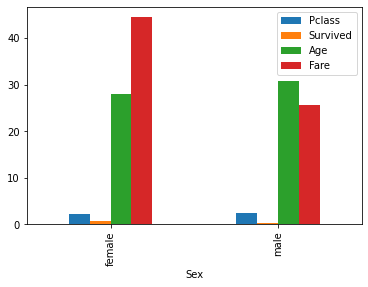

In [100]:
subset_5.groupby('Sex').mean().plot(kind='bar')

<AxesSubplot:>

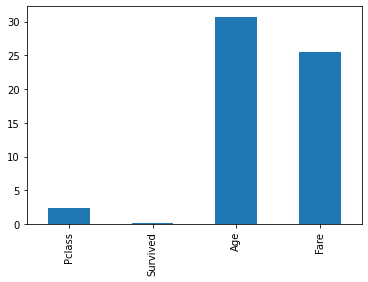

In [101]:
subset_5.groupby('Sex').get_group('male').mean().plot(kind='bar')

<AxesSubplot:>

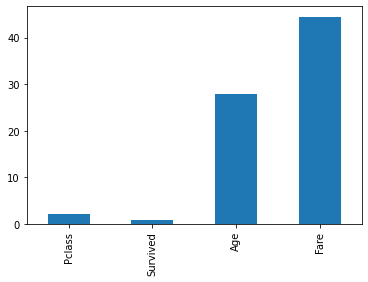

In [102]:
subset_5.groupby('Sex').get_group('female').mean().plot(kind='bar')